In [1]:
%pylab inline
# %matplotlib inline
from pyiga import bspline, geometry, vis
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


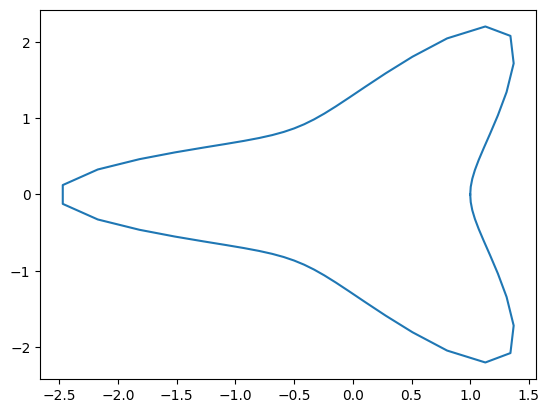

In [2]:
# Superformula plot with Matplotlib
s1 = 3;
s2 = 7;
n1 = s1;
n2 = s1+s2;
n3 = n2;
m = 3;
num_pts = 64;

theta = np.linspace(0,2*np.pi,num_pts) # 64 points from 0 to 2pi
r = ((np.abs(np.cos(m * theta / 4)) ** n2 + np.abs(np.sin(m * theta / 4)) ** n3) ** (-1 / n1))
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x,y)

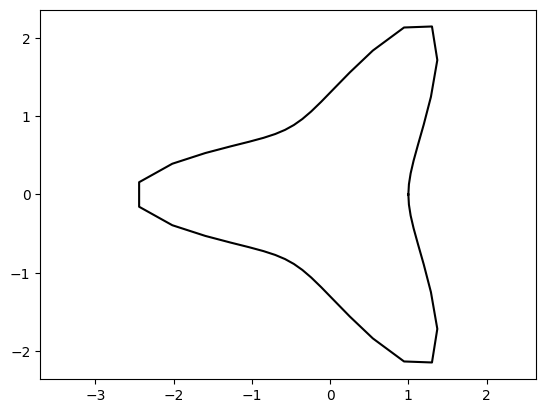

In [3]:
# Try to do superformula with PyIGA
def f(theta):
    r = ((np.abs(np.cos(m * theta / 4)) ** n2 + np.abs(np.sin(m * theta / 4)) ** n3) ** (-1 / n1))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return (x, y)

theta_lim = 2*np.pi
f_func = geometry.UserFunction(f, [[0,theta_lim]])
# UserFunction takes the function f and the bounds for the variables
vis.plot_geo(f_func) # Plots the function
axis('equal');

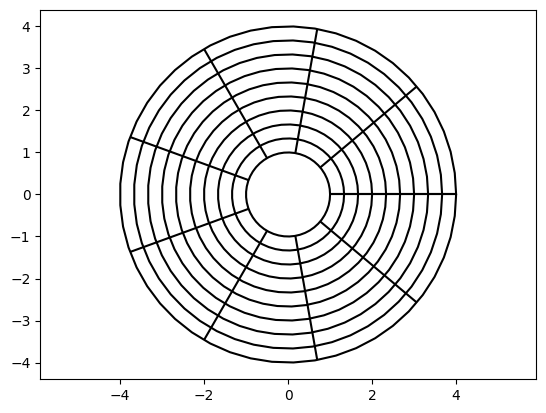

In [4]:
# Try to do simple circle to see if it meshes
def f(r,theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return (x, y)

theta_lim = 2*np.pi
rad_lim = 4
f_func = geometry.UserFunction(f, [[0,theta_lim],[1,rad_lim]]) # Theta and radius need to switch order to work
vis.plot_geo(f_func)
axis('equal');

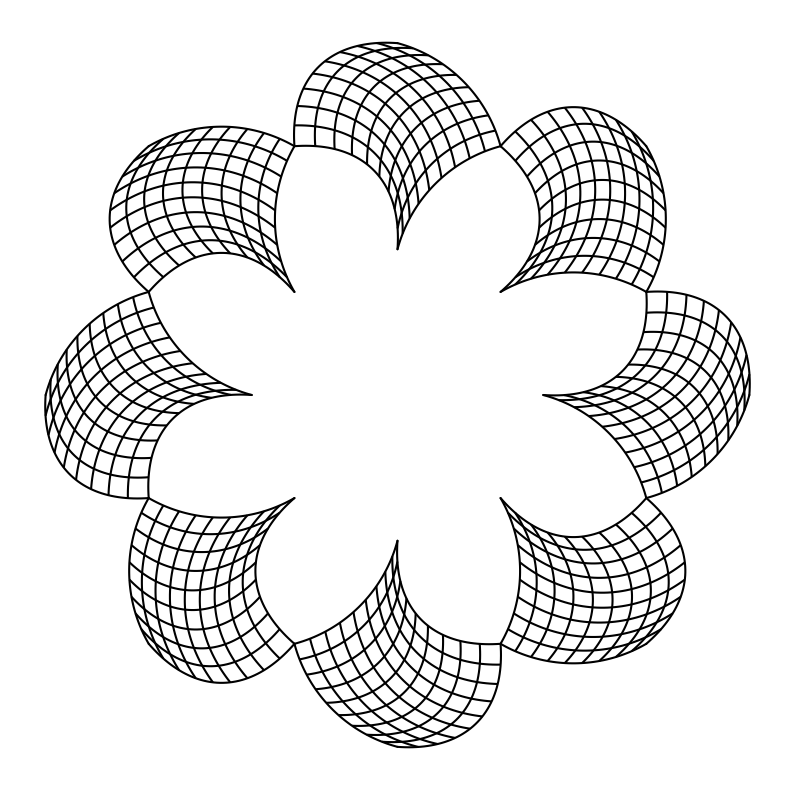

In [5]:
# Direct from PyIGA Example
figsize(10,10)
G1 = geometry.circular_arc(pi/3).translate((-1,0)).rotate_2d(-pi/6)
G2 = G1.scale(-1).rotate_2d(pi/2)
G1 = G1.translate((1,1))
G2 = G2.translate((1,1))

G = geometry.outer_product(G1, G2).translate((-1,-2)).rotate_2d(3*pi/4).translate((0,1))

for i in range(8):
    vis.plot_geo(G.rotate_2d(i*pi/4))
axis('equal');
axis('off');

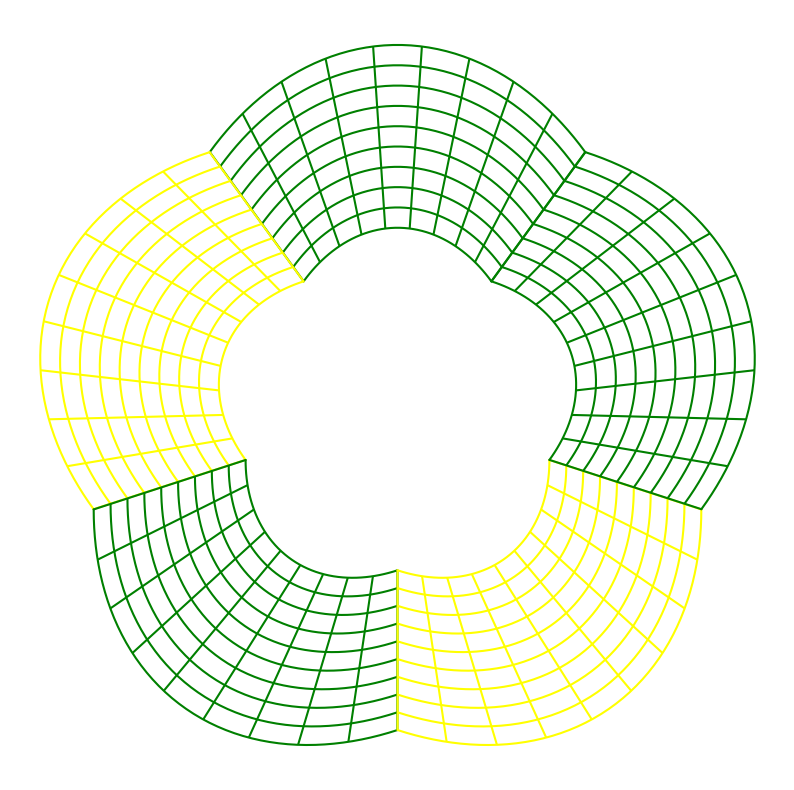

In [6]:
n = 2
f = geometry.circular_arc(pi/n) 
g = geometry.line_segment([0.5,0.5], [1,1])
G = geometry.outer_product(f,g) # create pie slice
# vis.plot_geo(G)
G1 = G.rotate_2d(pi*0.25) # rotate pie slice to upright position
# vis.plot_geo(G1)

a = 0.726
b = 0.4
m = 5

G2 = G1.scale([a,1]) # shrink pie slice in x-dir
# vis.plot_geo(G2)
col = ['green','yellow']

for i in range(m):
    vis.plot_geo(G2.rotate_2d(i*pi*b),color=col[i%2]) # alternate colors

axis('equal');
axis('off');
print(G2)

In [8]:
g.copy

<bound method BSplineFunc.copy of <pyiga.bspline.BSplineFunc object at 0x0000021AA5231790>>